<a href="https://colab.research.google.com/github/suparuek2405/DADS6003_ML/blob/main/Assignment%20week%2013/SVM_and_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 1: SVM

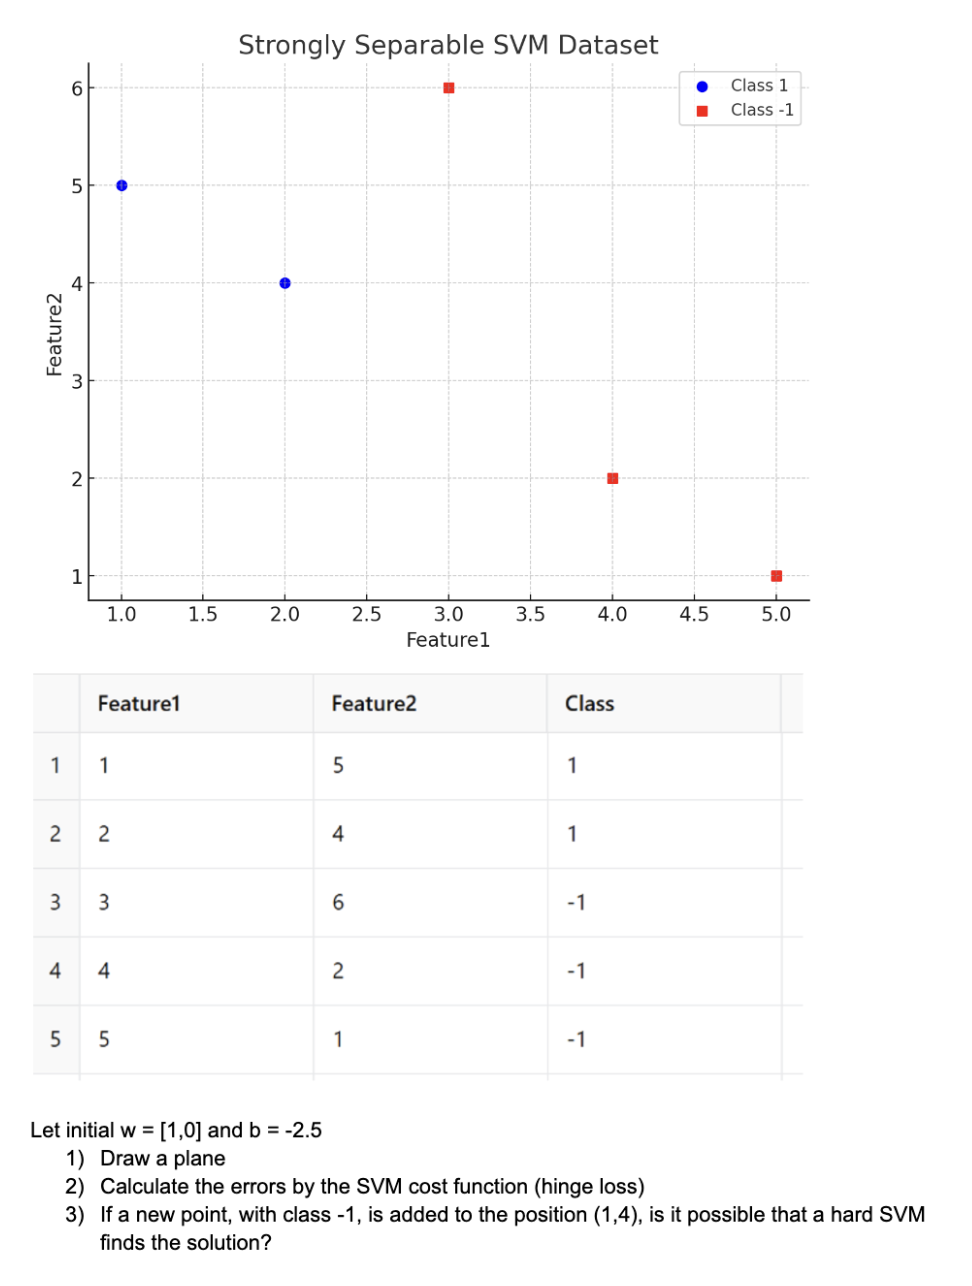

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.array([
    [1, 5, 1],
    [2, 4, 1],
    [3, 6, -1],
    [4, 2, -1],
    [5, 1, -1]
])

In [5]:
X = data[:, :2]  # Features
y = data[:, 2]   # Labels

In [8]:
#initial params
w = np.array([1, 0])
b = -2.5

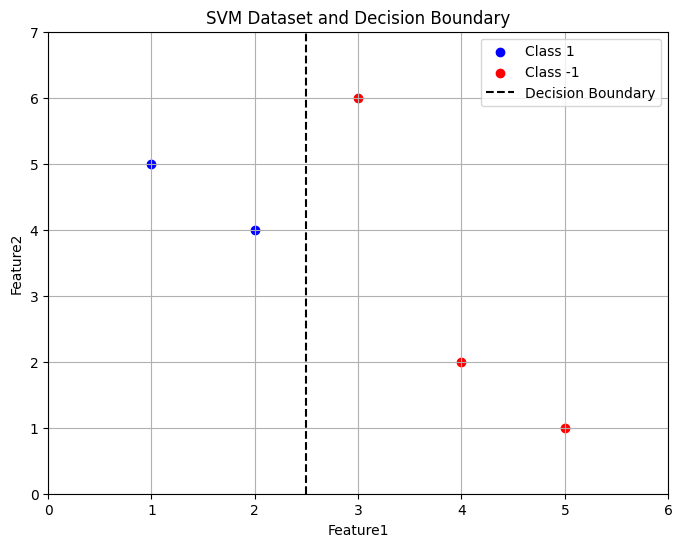

In [14]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')

# Plot decision boundary (x1 = 2.5)
x_boundary = np.linspace(0, 6, 100)
y_boundary = - (w[0] / w[1]) * x_boundary - (b / w[1]) if w[1] != 0 else None
if y_boundary is not None:
    plt.plot(x_boundary, y_boundary, label="Decision Boundary", color="black")
else:
    plt.axvline(-b / w[0], color="black", linestyle="--", label="Decision Boundary")

plt.xlim(0, 6)
plt.ylim(0, 7)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("SVM Dataset and Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def hinge_loss(w, b, X, y):
    losses = []
    for i in range(len(X)):
        margin = y[i] * (np.dot(w, X[i]) + b)
        loss = max(0, 1 - margin)
        losses.append(loss)
    return losses

# Calculate hinge losses
losses = hinge_loss(w, b, X, y)

# Print results
for i, loss in enumerate(losses):
    print(f"Point {X[i]} with class {y[i]} has hinge loss: {loss:.2f}")

Point [1 5] with class 1 has hinge loss: 2.50
Point [2 4] with class 1 has hinge loss: 1.50
Point [3 6] with class -1 has hinge loss: 1.50
Point [4 2] with class -1 has hinge loss: 2.50
Point [5 1] with class -1 has hinge loss: 3.50


In [11]:
# Add new point
new_point = np.array([1, 4])  # Features of the new point
new_class = -1               # Class of the new point

# Compute hinge loss for the new point
new_margin = new_class * (np.dot(w, new_point) + b)
new_loss = max(0, 1 - new_margin)

print(f"New point {new_point} with class {new_class} has hinge loss: {new_loss:.2f}")

# Check if hard SVM can separate
if new_loss > 0:
    print("Hard SVM cannot separate the data with the new point added.")
else:
    print("Hard SVM can still separate the data.")

New point [1 4] with class -1 has hinge loss: 0.00
Hard SVM can still separate the data.


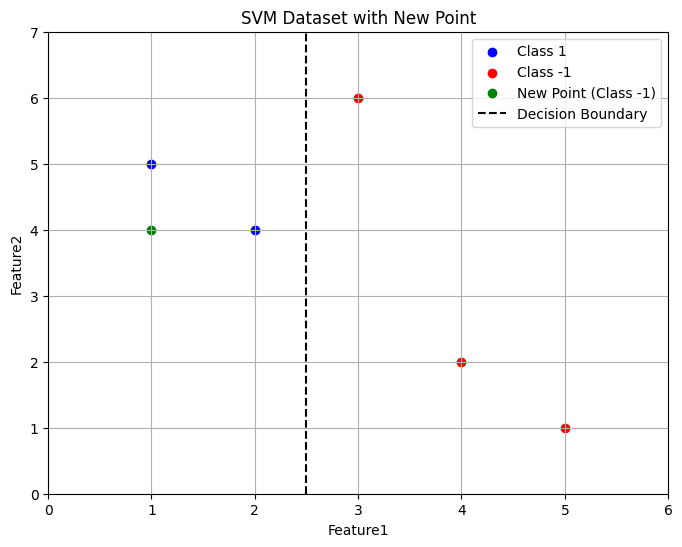

In [20]:
# Add the new point to the plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')


plt.scatter(new_point[0], new_point[1], color='green', label='New Point (Class -1)')

# Plot decision boundary
if y_boundary is not None:
    plt.plot(x_boundary, y_boundary, label="Decision Boundary", color="black")
else:
    plt.axvline(-b / w[0], color="black", linestyle="--", label="Decision Boundary")

plt.xlim(0, 6)
plt.ylim(0, 7)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("SVM Dataset with New Point")
plt.legend()
plt.grid(True)
plt.show()

----

### Assignment 2: Kmeans